In [7]:
import numpy as np
import matplotlib.pyplot as plt
import struct

In [8]:
with open('train-images.idx3-ubyte','rb') as f:
    buffer = f.read(16)
    head = struct.unpack('>iiii',buffer)
    print(head)
    buffer = f.read(head[1]*head[2]*head[3])
    data = struct.unpack('>{}B'.format(head[1]*head[2]*head[3]),buffer)

(2051, 60000, 28, 28)


In [9]:
len(data)

47040000

In [10]:
imgs = np.reshape(data,(head[1],head[2],head[3]))


In [11]:
imgs.shape

(60000, 28, 28)

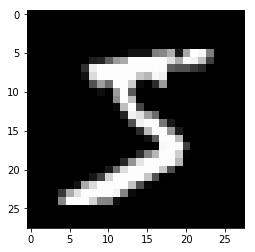

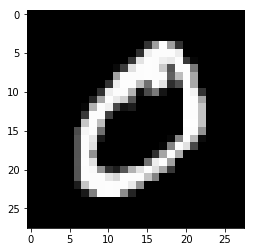

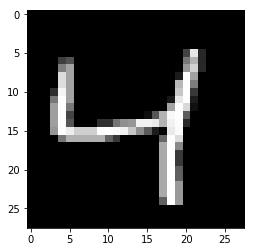

In [15]:
for i in range(3):
    plt.imshow(imgs[i], cmap='gray')
    plt.show()

In [16]:
with open('train-labels.idx1-ubyte','rb') as f:
    buffer = f.read(8)
    head = struct.unpack('>ii',buffer)
    print(head)
    buffer = f.read(head[1])
    data = struct.unpack('>{}B'.format(head[1]),buffer)

(2049, 60000)


In [17]:
y = np.array(data)

In [18]:
y.shape

(60000,)

In [19]:
y[:3]

array([5, 0, 4])

In [20]:
X = imgs.reshape(len(imgs),-1)

In [21]:
X.shape

(60000, 784)

In [22]:
from ML.knn import KNeighborsClassifier

In [23]:
clf = KNeighborsClassifier()

In [24]:
clf.fit(X,y)

In [25]:
clf.predict(X[:3])

array([5, 0, 4])

In [27]:
with open('t10k-images.idx3-ubyte','rb') as f:
    buffer = f.read(16)
    head = struct.unpack('>iiii',buffer)
    print(head)
    buffer = f.read(head[1]*head[2]*head[3])
    data = struct.unpack('>{}B'.format(head[1]*head[2]*head[3]),buffer)
    imgs_test = np.reshape(data,(head[1],head[2],head[3]))

(2051, 10000, 28, 28)


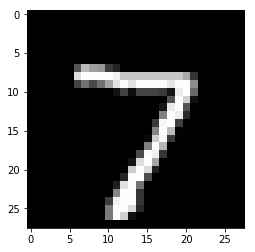

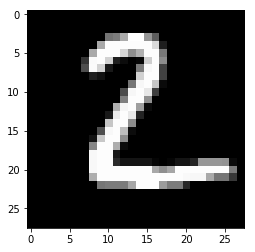

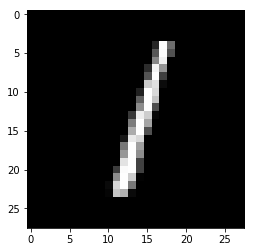

In [28]:
for i in range(3):
    plt.imshow(imgs_test[i], cmap='gray')
    plt.show()

In [ ]:
with open('t10k-labels.idx1-ubyte','rb') as f:
    buffer = f.read(8)
    head = struct.unpack('>ii',buffer)
    print(head)
    buffer = f.read(head[1])
    data = struct.unpack('>{}B'.format(head[1]),buffer)

In [29]:
X_test = imgs_test.reshape(len(imgs_test),-1)

In [30]:
clf.predict(X_test[:3])

array([7, 2, 1])